# DATA PREPROCESSING

In [2]:
import numpy as np
import pandas as pd

<a id="1"></a>


# NUMERICAL DATA

Quantitative data is the measurement of something. For example:
* Class size
* Monthly sales
* Student scores

The natural way to represent these quantities is numerically. In this section we will cover numerous strategies for transforming raw numerical data into features purposebuilt for machine learning algorithms.


<a id="2"></a>


## RESCALING a FEATURE

Rescaling is a common preprocessing task. In this section we will learn:

* MinMaxScaler
* StandardScaler
* RobustScaler
* Normalizer

> You need to rescale the values of a numerical feature to be between two values.

<a id="3"></a>

### MinMaxScaler

* One of the simplest rescaling technique.
* Min-max scaling uses the minimum and maximum values of a feature to rescale values to within a range.

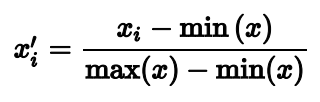

In [3]:
from sklearn import preprocessing

In [4]:
# Create feature
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

In [5]:
preprocessing.minmax_scale(feature_range=(0,1),X=feature)

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

# OR

In [6]:
scaler=preprocessing.MinMaxScaler(feature_range=(1,5))
scaler.fit_transform(feature)

array([[1.        ],
       [2.14285714],
       [2.42857143],
       [2.71428571],
       [5.        ]])

<a id="4"></a>


### StandardScaler

* A common alternative to min-max scaling.
* Rescaling of features to be approximately standard normally distributed.
* To achieve this, we use standardization to transform the data such that:
  * Mean = 0
  * Standard Deviation = 1
  
  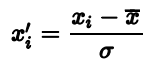

 **->** Principal Component Analysis (PCA) often works better using standardization, while min-max scaling is often recommended for Neural Networks

> You want to transform a feature to have a mean of 0 and a standard deviation of 1

In [7]:
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

In [8]:
scaler=preprocessing.StandardScaler()
standardized=scaler.fit_transform(x)
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

> Lets check

In [9]:
print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

Mean: 0
Standard deviation: 1.0


<a id="5"></a>


### RobustScaler

* If our data has significant outliers, it can negatively impact our standardization by affecting the feature’s mean and variance.
* In this scenario, it is often helpful to instead rescale the feature using the median and quartile range.

In [10]:
robust_scaler=preprocessing.RobustScaler()
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

<a id="6"></a>


### Normalizer
* Many rescaling methods (e.g., min-max scaling and standardization) operate on features; however, we can also rescale across **individual observations**.
* *Normalizer* rescales the values on individual observations to have unit norm (the sum of their lengths is 1).
* This type of rescaling is often used when we have many equivalent features for example: Text Classification
* *Normalizer* provides three norm options with **Euclidean norm** (often called L2) being the default argument:


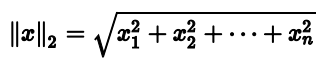

> You want to rescale the feature values of observations to have unit norm (a total
length of 1).

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

In [13]:
normalizer=Normalizer(norm="l2")
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

 ### Manhattan Norm (L1):

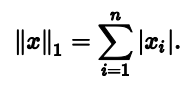

In [14]:
data_l1_norm=Normalizer(norm="l1").transform(features)
data_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

<a id="7"></a>


## GENERATING POLYNOMIAL and INTERACTION FEATURES

* Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target.
* For example: we might suspect that the effect of age on the probability of having a major medical condition is not constant over time but increases as age increases.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

> You want to create polynominal and interaction features.

In [16]:
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

In [17]:
polynomial_interaction=PolynomialFeatures(degree=2,include_bias=False)  
# degree: Maximum degree of the polynomial
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

> We can restrict the features created to only interaction features by setting *interaction_only* = True:

In [18]:
interaction=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

<a id="8"></a>

# TRANSFORMING FEATURES

* It is common to want to make some custom transformations to one or more features.
* We can do this by creating a function and then mapping it to features using either **scikit-learn**’s *FunctionTransformer* or **pandas**’ *apply*.

In [19]:
from sklearn.preprocessing import FunctionTransformer

> You want to make a custom transformation to one or more features.

In [20]:
# Create function:
def multiply(x):
    return x*100

In [21]:
# Scikit-Learn:
transformer=FunctionTransformer(multiply)
transformer.fit_transform(features)

array([[200, 300],
       [200, 300],
       [200, 300]])

In [22]:
# Pandas:
df=pd.DataFrame(features,columns=["num_1","num_2"])
df.apply(multiply)

,num_1,num_2
0,200,300
1,200,300
2,200,300


<a id="9"></a>


# DETECTING OUTLIERS

* There is no single best technique for detecting outliers.
* We have a collection of techniques all with their own advantages and disadvantages.
* Our best strategy is often trying multiple techniques and looking at the results as a whole.
    * EllipticEnvelope
    * IQR Based Detection

In [23]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

> You want to identify extreme observations.

<a id="10"></a>

### EllipticEnvelope

In [24]:
features,_=make_blobs(n_samples=10,
                     n_features=2,
                     centers=1,
                     random_state=1)

In [25]:
# Replace with extreme values:
features[0,0]=10000
features[0,1]=10000

In [26]:
# Detector:
outlier_detector=EllipticEnvelope(contamination=.1)

In [27]:
# Fit:
outlier_detector.fit(features)

EllipticEnvelope()

In [28]:
# Predict Outliers:
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

<a id="11"></a>


### IQR Based Detection

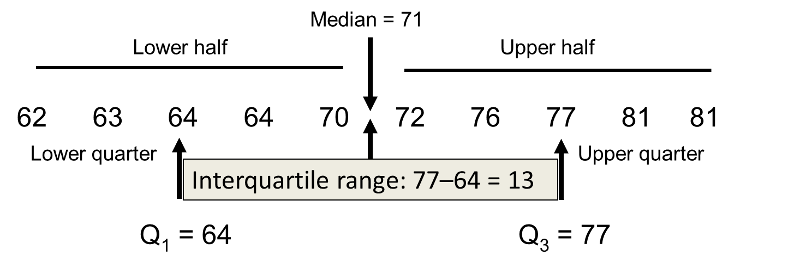

In [29]:
# Create one feature:
feature=pd.DataFrame(features[:,0])

In [30]:
Q1=feature.quantile(0.25)
Q3=feature.quantile(0.75)
IQR=Q3-Q1
print("First Quartile: ",Q1)
print("Third Quartile: ",Q3)
print("Interquartile: ",IQR)

First Quartile:  0   -1.890819
Name: 0.25, dtype: float64
Third Quartile:  0   -0.279537
Name: 0.75, dtype: float64
Interquartile:  0    1.611283
dtype: float64


In [31]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit: ",lower_limit)
print("Upper Limi: ",upper_limit)

Lower Limit:  0   -4.307744
dtype: float64
Upper Limi:  0    2.137388
dtype: float64


In [32]:
((feature<lower_limit) | (feature>upper_limit))

,0
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


For more about Outliers you can look : https://www.kaggle.com/code/hilalmleykeyuksel/statistical-learning-tutorial

<a id="12"></a>


# HANDLING OUTLIERS

* Similar to detecting outliers, there is no hard-and-fast rule for handling them.
* How we handle outliers should be based on two aspects:
    1. We should consider what makes them an outlier.
    1. How we handle outliers should be based on our goal for Machine Learning.

**->** If we believe they are errors in the data such as from a broken sensor or a miscoded value, then we might drop the observation or replace outlier values with NaN since we can’t believe those values.

**->** If we believe the outliers are genuine extreme values (a house with 200 bathrooms), then marking them as outliers or transforming their values is more appropriate.


In [33]:
# Lets create a data set:
houses=pd.DataFrame()
houses["Price"]=[600000,850000,350000,450000]
houses["Kitchens"]=[3,5.7,2,250]
houses["Square_Meter"]=[250,300,600,15000]
houses.head()

,Price,Kitchens,Square_Meter
0,600000,3.0,250
1,850000,5.7,300
2,350000,2.0,600
3,450000,250.0,15000


In [34]:
Q1=houses["Kitchens"].quantile(0.25)
Q3=houses["Kitchens"].quantile(0.75)
IQR=Q3-Q1
print("First Quartile: ",Q1)
print("Third Quartile: ",Q3)
print("Interquartile: ",IQR)
print("*********************************************************")
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit: ",lower_limit)
print("Upper Limi: ",upper_limit)

First Quartile:  2.75
Third Quartile:  66.775
Interquartile:  64.025
*********************************************************
Lower Limit:  -93.28750000000001
Upper Limi:  162.8125


In [35]:
((houses["Kitchens"]<lower_limit) | (houses["Kitchens"]>upper_limit))

0    False
1    False
2    False
3     True
Name: Kitchens, dtype: bool

<a id="13"></a>

### 1. Trimming / Remove
* Data trimming is the process of removing or excluding extreme values, or outliers, from a data set.

In [36]:
house_kitchen=pd.DataFrame(houses["Kitchens"])

In [37]:
trim_outlier_houses_data=house_kitchen[~((house_kitchen<(lower_limit)) | (house_kitchen>(upper_limit))).any(axis=1)]
trim_outlier_houses_data

,Kitchens
0,3.0
1,5.7
2,2.0


<a id="14"></a>

### 2. Imputation
* Outliers are imputed with some representative values and statistical methods. (Mean, Median)

In [38]:
outlier_TF=((houses["Kitchens"]<lower_limit) | (houses["Kitchens"]>upper_limit))
outlier_TF

0    False
1    False
2    False
3     True
Name: Kitchens, dtype: bool

In [39]:
house_kitchen_mean=pd.DataFrame(houses["Kitchens"])

In [40]:
house_kitchen_mean[outlier_TF]=house_kitchen_mean.mean()
house_kitchen_mean

,Kitchens
0,3.000
1,5.700
2,2.000
3,65.175


 It's steel outlier for our data set. 😅😅 65 Kitchen!?

In [41]:
house_kitchen_median=pd.DataFrame(houses["Kitchens"])

In [42]:
# Let's try Median
house_kitchen_median[outlier_TF]=house_kitchen_median.median()
house_kitchen_median

,Kitchens
0,3.00
1,5.70
2,2.00
3,4.35


Median is better 😀

<a id="15"></a>

### 3. Winsorization
* Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data.

In [43]:
house_kitchen_winsorization=pd.DataFrame(houses["Kitchens"])
house_kitchen_winsorization

,Kitchens
0,3.0
1,5.7
2,2.0
3,250.0


In [44]:
house_kitchen_winsorization[outlier_TF]=lower_limit
house_kitchen_winsorization

,Kitchens
0,3.0000
1,5.7000
2,2.0000
3,-93.2875


Negative value kitchen 🤦‍♀️🤦‍♀️🤦‍♀️

<a id="16"></a>

# DISCRETIZATION FEATURES

* Discretization can be a fruitful strategy when we have reason to believe that a numerical feature should behave more like a categorical feature.
* Depending on how we want to break up the data, there are two techniques we can use:
    1. Binarize (Scikit-Learn)
    2. Digitize(NumPy)

In [45]:
age=np.array([
    [12],
    [73],
    [25],
    [42],
    [9],
    [37]
])

> You have a numerical feature and want to break it up into discrete bins.

<a id="17"></a>

### Binarize (Scikit-Learn)

In [46]:
from sklearn.preprocessing import Binarizer

In [47]:
binarizer=Binarizer(threshold=18)
binarizer.fit_transform(age)
# Convert values which is 18 and smaller then 18 = 0
# Bigger than 18 = 1

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1]])

<a id="18"></a>

### Digitize (NumPy)

In [48]:
np.digitize(age,bins=[20])
# Convert values which is 20 and smaller then 20 = 0
# Bigger than 20 = 1

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [49]:
# Multiple Threshold:
np.digitize(age,bins=[20,30,70])

array([[0],
       [3],
       [1],
       [2],
       [0],
       [2]])

<a id="19"></a>

# GROUPING OBSERVATIONS USING CLUSTERING

* If you know that you have k groups, you can use k-means clustering to group similar observations and output a new feature containing each observation’s group membership.

> You want to cluster observations so that similar observations are grouped
together.

<a id="20"></a>


### K-Means

* In K-Means Clustering, the algorithm attempts to group observations into k groups, with each group having **roughly equal variance**.

In [50]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [51]:
# Create Data Frame:
features,_=make_blobs(n_samples=50,
                    n_features=2,
                    centers=3,
                    random_state=1)
data=pd.DataFrame(features,columns=["F_1","F_2"])
data.head()

,F_1,F_2
0,-9.877554,-3.336145
1,-7.287210,-8.353986
2,-6.943061,-7.023744
3,-7.440167,-8.791959
4,-6.641388,-8.075888


In [52]:
# K-Means:
cluster=KMeans(3,random_state=0) # k=3 We group data to 3 differrent category
cluster.fit(features)

KMeans(n_clusters=3, random_state=0)

In [53]:
# Predict:
data["group"]=cluster.predict(features)
data.head(10)

,F_1,F_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2
5,-0.794152,2.104951,1
6,-2.760179,5.551214,1
7,-9.946905,-4.590344,0
8,-0.525790,3.306599,1
9,-1.981977,4.022436,1


<a id="21"></a>


# DELETING OBSERVATIONS with MISSING VALUES

* Most machine learning algorithms cannot handle any missing values in the target and feature arrays.
* For this reason, we cannot ignore missing values in our data and must address the issue during preprocessing.
* The simplest solution is to delete every observation that contains one or more missing values. 
* BUT we should be very **reluctant** to delete observations with missing values.
* Deleting them is the nuclear option, since our algorithm **loses** access to the **information** contained in the observation’s non-missing values.

In [54]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [55]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [56]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [57]:
df.dropna(inplace=True) # inplace=True -> dropNa will drop all missing values from our original dataset. 
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


<a id="22"></a>

# IMPUTING MISSING VALUES
* Fill in all missing values with some average value.
* We can use Machine Learning to predict the values of the missing data. (K-Nearest Neighboor)

In [58]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


<a id="23"></a>

### Simple Imputaion

In [59]:
df["V1"].mean()

6.0

In [60]:
# Fill with Mean
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [61]:
# Fill with 0
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [62]:
# IMPUTE with SCIKIT-LEARN IMPUTER
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(strategy="mean")
features_mean_imputed = mean_imputer.fit_transform(df)
print("Imputed Value:", features_mean_imputed[0,0])

Imputed Value: 1.0


<a id="24"></a>

### Imputation with Machine Learning (Option 1)

In [63]:
 pip install fancyimpute

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=06d79ac0c62c0fb046cbbbd08b2360966c77e00e2f93013f3f680eac04223a7c
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=3a8745921a637e6cd6fb8b8aa6176e640be270c48e3ba47c22d5ee9d0a6c57f7
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c079

In [64]:
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler

In [65]:
# Standardization:
scaler=StandardScaler()
standardize_features=scaler.fit_transform(df)

In [66]:
true_value=standardize_features[0,0]
standardize_features[0,0]=np.nan

In [67]:
features_knn_imputed=KNN(k=4,verbose=0).fit_transform(standardize_features)
print("True Value",true_value)
print("Imputed Value",features_knn_imputed[0,0])

True Value -1.0801234497346432
Imputed Value 0.39765055481384176


### Imputation with Machine Learning (Option 2)

In [68]:
pip install ycimpute

Note: you may need to restart the kernel to use updated packages.


In [69]:
from ycimpute.imputer import knnimput

In [70]:
# Convert the Data Frame to NumPy array:
np_df=np.array(df)

In [71]:
without_missing_df=knnimput.KNN(k=4).complete(np_df)
without_missing_df=pd.DataFrame(without_missing_df,columns=["V1","V2","V3"])
without_missing_df

Imputing row 1/9 with 1 missing, elapsed time: 0.001
[KNN] Warning: 3/27 still missing after imputation, replacing with 0


,V1,V2,V3
0,1.000000,7.000000,7.000109
1,3.000000,7.878983,12.000000
2,6.000000,5.000000,5.000000
3,1.181202,8.000000,6.000000
4,7.000000,12.000000,14.000000
5,1.000000,7.000972,7.000000
6,0.000000,0.000000,0.000000
7,9.000000,2.000000,2.000000
8,15.000000,3.000000,31.000000


<a id="25"></a>

# CATEGORICAL DATA

* It is often useful to measure objects not in terms of their quantity but in terms of some quality.
* We frequently represent this qualitative information as an observation’s membership in a discrete category such as gender, colors, or brand of car.
* However, not all categorical data is the same. Sets of categories with no intrinsic ordering is called **nominal**.
* **Example for Nominal Categories:**
    - Blue, Purple, Red
    - Man, Woman
    - Kiwi, Banana, Watermelon

* When a set of categories has some natural ordering we refer to it as **ordinal**.
* **Example for Ordinal Categories:**
    - Low, Medium, High
    - Young, Old
    - Agree, Neutral, Disagree

<a id="26"></a>

# ENCODING NOMINAL CATEGORICAL FEATURES

<a id="27"></a>

### One-Hot Encoding

In [72]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer

In [73]:
countries = np.array([
    ["Turkey"],
    ["USA"],
    ["Canada"],
    ["Spain"],
    ["Turkey"],
    ["Canada"],

])

In [74]:
# LabelBinarizer
one_hot=LabelBinarizer()
one_hot.fit_transform(countries)

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [75]:
# Inverse Transform:
one_hot.inverse_transform(one_hot.fit_transform(countries))

array(['Turkey', 'USA', 'Canada', 'Spain', 'Turkey', 'Canada'],
      dtype='<U6')

In [76]:
multi_countries=[
    ("Turkey","Istanbul"),
    ("USA","California"),
    ("France","Nice"),
    ("Turkey","Antalya"),
    ("Italy","Milano"),
    ("Turkey","Istanbul"),
    ("France","Paris"),
    ("USA","California"),
    
]

In [77]:
# MultiLabelBinarizer:
one_hot_multiple=MultiLabelBinarizer()
one_hot_multiple.fit_transform(multi_countries)

array([[0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

In [78]:
one_hot_multiple.classes_

array(['Antalya', 'California', 'France', 'Istanbul', 'Italy', 'Milano',
       'Nice', 'Paris', 'Turkey', 'USA'], dtype=object)

<a id="28"></a>

### Dummy Variable Trap

* The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear).
* This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models.


In [79]:
import pandas as pd
pd.get_dummies(countries[:,0])

,Canada,Spain,Turkey,USA
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,1,0,0,0


<a id="29"></a>

# ENCODING ORDINAL CATEGORICAL FEATURES

In [80]:
score_data=pd.DataFrame(["Low","High","Low","Medium","High"],columns=["Score"])
score_data.head()

,Score
0,Low
1,High
2,Low
3,Medium
4,High


In [81]:
scale_mapper={
    "Low":1,
    "Medium":2,
    "High":3
}

In [82]:
score_data["Score"].replace(scale_mapper)

0    1
1    3
2    1
3    2
4    3
Name: Score, dtype: int64

<a id="30"></a>

# TEXT

* Unstructured text data, like the contents of a book or a tweet, is both one of the most interesting sources of features and one of the most complex to handle.
* In this section, we will cover strategies for transforming text into information-rich features.

<a id="31"></a>

# CLEANING TEXT

* Most text data will need to be cleaned before we can use it to build features.
* Most basic text cleaning can be completed using Python’s standard string operations.

In [83]:
text_data = [" Interrobang. By Aishwarya Henriette ",
             "Parking And Going. By Karl Gautier",
             " Today Is The night. By Jarek Prakash "]

In [84]:
# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]
strip_whitespace

['Interrobang. By Aishwarya Henriette',
 'Parking And Going. By Karl Gautier',
 'Today Is The night. By Jarek Prakash']

In [85]:
# Remove periods
remove_periods = [string.replace(".", "") for string in strip_whitespace]
remove_periods

['Interrobang By Aishwarya Henriette',
 'Parking And Going By Karl Gautier',
 'Today Is The night By Jarek Prakash']

In [86]:
remove_periods_DF=pd.DataFrame(remove_periods,columns=["sentence"])
remove_periods_DF["sentence"]=remove_periods_DF["sentence"].apply(lambda x: " ".join(x.lower() for x in x.split()))
remove_periods_DF["sentence"]

0     interrobang by aishwarya henriette
1      parking and going by karl gautier
2    today is the night by jarek prakash
Name: sentence, dtype: object

<a id="32"></a>

# REMOVING PUNCTUATION

* It is important to be conscious of the fact that punctuation contains information. For example: “Right?” versus “Right!”.
* Removing punctuation is often a necessary evil to create features.
* if the punctuation is important we should make sure to take that into account.


In [87]:
import unicodedata
import sys

In [88]:
text_data = ['Hi!!!! I. Love. This. Song....',
             '10000% Agree!!!! #LoveIT',
             'Right?!?!']

In [89]:
punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

<a id="33"></a>

# TOKENIZING TEXT

* Tokenization, especially word tokenization, is a common task after cleaning text data.
* Because it is the first step in the process of turning the text into data we will use to construct useful features.

In [90]:
from nltk.tokenize import word_tokenize

In [91]:
string="The science of today is the technology of tomorrow"

In [92]:
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

We can also tokenize into sentences

In [93]:
from nltk.tokenize import sent_tokenize

In [94]:
string="The science of today is the technology of tomorrow. Today science be."
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Today science be.']

<a id="34"></a>

# REMOVING STOP WORDS

* While “stop words” can refer to any set of words we want to remove before processing.
* Frequently the term refers to extremely common words that themselves contain little information value.


In [95]:
from nltk.corpus import stopwords

* NLTK has a list of common stop words that we can use to find and remove stop words in our tokenized words:

In [96]:
tokenized_words = ['i',
                   'am',
                   'going',
                   'to',
                   'go',
                   'to',
                   'the',
                   'store',
                   'and',
                   'park']

In [97]:
stop_words=stopwords.words("english")
[word for word in tokenized_words if word not in stop_words]

['going', 'go', 'store', 'park']

In [98]:
# Lets look stop words:
stop_words[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

<a id="35"></a>

# STEMMING WORDS
* Stemming reduces a word to its stem by identifying and removing affixes while keeping the **root meaning** of the word.
* **For Example:**
    - "Tradition" and "Traditional" have "tradit" as their stem.
* By stemming our text data, we transform it to something less readable, but closer to its base meaning and thus more suitable for comparison across observations.

In [99]:
from nltk.stem import PorterStemmer
porterstemmer=PorterStemmer()

In [100]:
text_data="Müleyke loved watching science fiction movies."
stems = [porterstemmer.stem(i) for i in text_data.split()]
print(' '.join(stems))

müleyk love watch scienc fiction movies.


<a id="36"></a>

# TAGGING PARTS of SPEECH

In [101]:
from nltk import pos_tag
from nltk import word_tokenize

In [102]:
text_data="Müleyke loved watching science fiction movies."
text_tagged= pos_tag(word_tokenize(text_data))
text_tagged

[('Müleyke', 'NNP'),
 ('loved', 'VBD'),
 ('watching', 'VBG'),
 ('science', 'NN'),
 ('fiction', 'NN'),
 ('movies', 'NNS'),
 ('.', '.')]

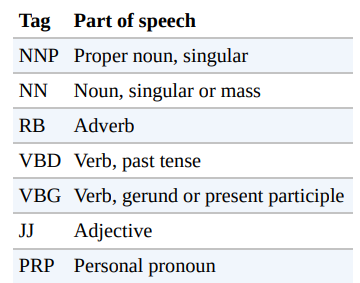

In [103]:
# Filter words
[word for word, tag in text_tagged if tag in ["NNP"]]

['Müleyke']

<a id="37"></a>

# ENCODING TEXT as a BAG OF WORDS

* Bag-of-words models output a feature for every unique word in text data.
* It turns text into **fixed-length** vectors by counting **how many times** each word appears.
* The text data in our solution was purposely small. **In the real world**, a single observation of text data could be the contents of an entire book!
* Bag-of-words model creates a feature for every unique word in the data.


In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
text_data = np.array(['I love Turkey. Turkey!',
                      'Sweden is best',
                      'Canada is very cold!'])

In [106]:
count=CountVectorizer()
bag_of_words=count.fit_transform(text_data)
bag_of_words

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [107]:
bag_of_words.toarray()

array([[0, 0, 0, 0, 1, 0, 2, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1]])

In [108]:
count.get_feature_names_out()

array(['best', 'canada', 'cold', 'is', 'love', 'sweden', 'turkey', 'very'],
      dtype=object)

* I love Turkey. Turkey! has a value of 2 in the "Turkey" feature. Because word *Turkey* appears two times!